In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df =pd.read_csv("/content/gdrive/MyDrive/Google Colab/yelp_data_sentiments.csv", on_bad_lines='skip')
df.head()

,stars,useful,funny,cool,text,data len,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity,sentiment
0,3,0,0,0,"If you decide to eat here, just be aware it is...",515,8,0.166667,3,0.062500,0.198485,0.412121,2 Star
1,5,1,0,1,I've taken a lot of spin classes over the year...,834,18,0.206897,1,0.011494,0.395455,0.571212,3 Star
2,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,339,6,0.150000,2,0.050000,0.139935,0.522294,2 Star
3,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",243,5,0.208333,2,0.083333,0.315152,0.733838,3 Star
4,4,1,0,1,Cute interior and owner (?) gave us tour of up...,535,12,0.190476,1,0.015873,0.416234,0.490260,4 Star


In [ ]:
data=df[["stars","data len","Positive_Word_Count","Positive_Words_%","Negative_Word_Count","Negative_Words_%","Polarity","Subjectivity","sentiment"]]
data.head()

,stars,data len,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity,sentiment
0,3,515,8,0.166667,3,0.062500,0.198485,0.412121,2 Star
1,5,834,18,0.206897,1,0.011494,0.395455,0.571212,3 Star
2,3,339,6,0.150000,2,0.050000,0.139935,0.522294,2 Star
3,5,243,5,0.208333,2,0.083333,0.315152,0.733838,3 Star
4,4,535,12,0.190476,1,0.015873,0.416234,0.490260,4 Star


In [ ]:
data.rename(columns={ 'Positive_Words_%': 'Positive_per', 'Negative_Words_%': 'Negative_per'},inplace=True)
data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,stars,data len,Positive_Word_Count,Positive_per,Negative_Word_Count,Negative_per,Polarity,Subjectivity,sentiment
0,3,515,8,0.166667,3,0.062500,0.198485,0.412121,2 Star
1,5,834,18,0.206897,1,0.011494,0.395455,0.571212,3 Star
2,3,339,6,0.150000,2,0.050000,0.139935,0.522294,2 Star
3,5,243,5,0.208333,2,0.083333,0.315152,0.733838,3 Star
4,4,535,12,0.190476,1,0.015873,0.416234,0.490260,4 Star


In [ ]:
r,p=stats.pearsonr(data.stars, data.Negative_Word_Count)
print("r =",r,"p =",p)

NameError: ignored

In [ ]:
r,p=stats.pearsonr(data.stars, data.Subjectivity)
print("r =",r,"p =",p)

r = 0.1867447248331463 p = 0.0


In [ ]:
r,p=stats.pearsonr(data.stars, data.Polarity)
print("r =",r,"p =",p)

r = 0.5665323678217675 p = 0.0


In [ ]:
r,p=stats.pearsonr(data.stars, data.Negative_per)
print("r =",r,"p =",p)

r = -0.39799329323913957 p = 0.0


In [ ]:
r,p=stats.pearsonr(data.stars, data.Positive_per)
print("r =",r,"p =",p)

r = 0.41096535463587897 p = 0.0


In [ ]:
star=df[["stars","sentiment"]]
star.head()

,stars,sentiment
0,3,2 Star
1,5,3 Star
2,3,2 Star
3,5,3 Star
4,4,4 Star


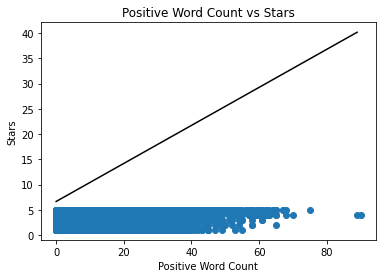

In [ ]:
# y= mx+b
m,b,r,p,err= stats.linregress(data.stars,data.Positive_Word_Count)

x= range(0, data.Positive_Word_Count.max())
y= m*x + b
plt.plot(x,y,color='black')
plt.scatter(data.Positive_Word_Count,data.stars)
plt.title('Positive Word Count vs Stars')
plt.ylabel('Stars')
plt.xlabel('Positive Word Count')
plt.show()

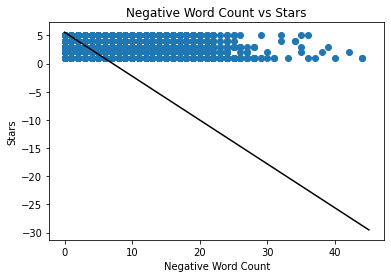

In [ ]:
# y= mx+b
m,b,r,p,err= stats.linregress(data.stars,data.Negative_Word_Count)

x= range(0, data.Negative_Word_Count.max() +2)
y= m*x + b
plt.plot(x,y,color='black')
plt.scatter(data.Negative_Word_Count,data.stars)
plt.title('Negative Word Count vs Stars')
plt.ylabel('Stars')
plt.xlabel('Negative Word Count')
plt.show()

In [ ]:
# y= mx+b
m,b,r,p,err= stats.linregress(data.stars,data.Positive_per)

x= range(18, data.Positive_per.max())
y= m*x + b
plt.plot(x,y,color='black')
plt.scatter(data.Positive_per,data.stars)
plt.title('Positive Word % vs Stars')
plt.ylabel('Stars')
plt.xlabel('Positive Word %')
plt.show()

TypeError: ignored